In [1]:
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
sns.set()

In [3]:
def mean(x):
    return sum(x) / (len(x))

In [4]:
def variance(x):
    return sum((x - mean(x)) ** 2) / (len(x) - 1)

In [5]:
def covariance(x, y):
    return sum((x - mean(x)) * (y - mean(y))) / (len(x) - 1)

In [6]:
X = np.random.randn(100)

In [7]:
y = np.random.randn(100)

In [8]:
def median(num):
    if len(num) % 2 != 0:  # it is odd
        mid_number_index = len(num) // 2
        return num[mid_number_index]
    else: # it is even
        interval_right = (len(num) // 2) + 1
        interval_left = (len(num) // 2) - 1
        return mean(num[interval_left: interval_right])

In [9]:
def mode(list_):
    counter = dict()
    for i in list_:
        counter[i] = 0
    
    for i in list_:
        counter[i] += 1
    
    max_val = 0
    mode_num = 0
    for key, value in counter.items():
        if value > max_val:
            max_val = value
            mode_num = key
    
    return mode_num

In [10]:
from matplotlib import pyplot as plt

In [11]:
def get_random_data():
    X = np.linspace(0,  1, 100)
    y = [np.random.randn() * np.random.randn() for x in X]
    return X,  y

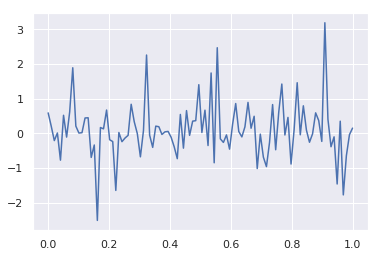

In [16]:
X, y = get_random_data()
plt.plot(X, y)
plt.show()

## Multiple plots

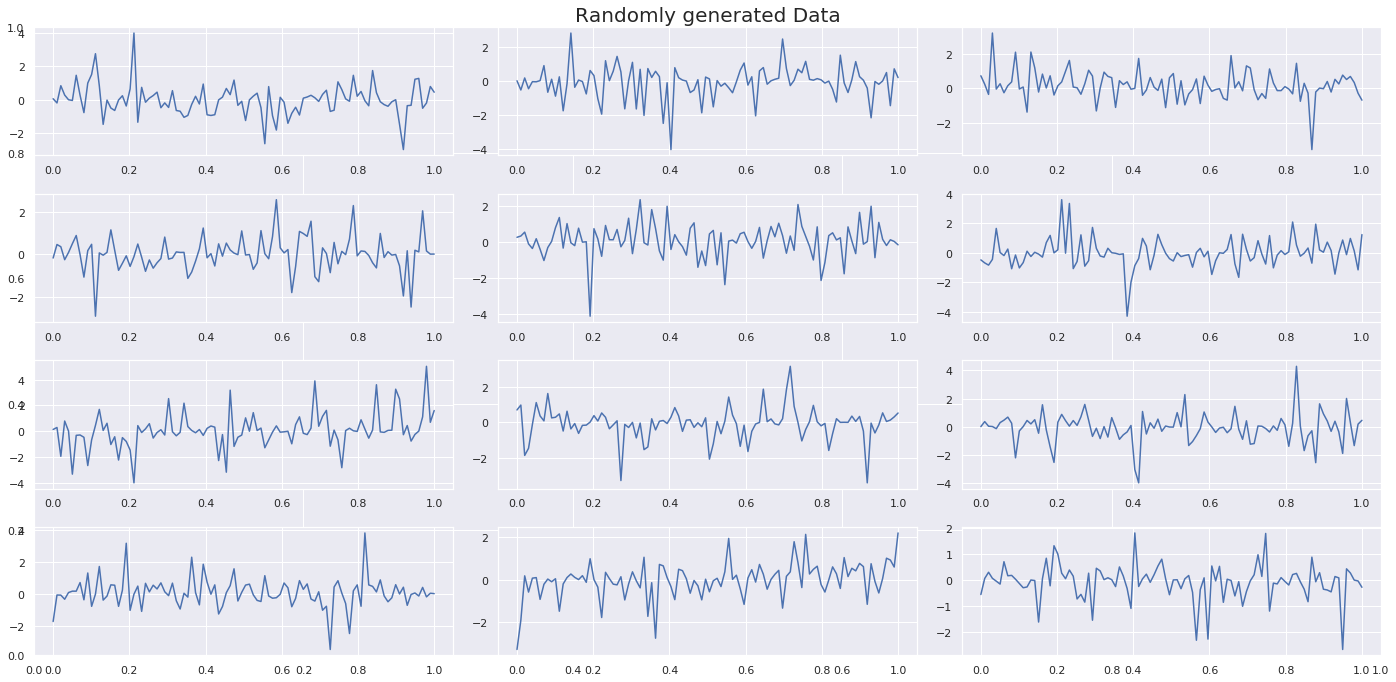

In [12]:
fig = plt.figure(figsize=(20, 10))
plt.title('Randomly generated Data', size=20)
for i in range(12):
    X, y = get_random_data()
    axs = fig.add_subplot(4, 3, i + 1)
    axs.plot(X, y)
plt.tight_layout()
plt.show()

## Bar chart

In [13]:
X = np.random.randint(low=10, high=50, size=1000)

In [14]:
def counter(list_):
    counter = dict()
    for i in list_:
        counter[i] = 0
    
    for i in list_:
        counter[i] += 1
    return counter

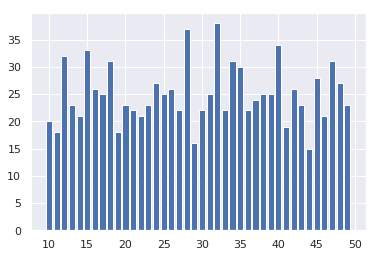

In [15]:
plt.bar(counter(X).keys(), counter(X).values())
plt.show()

In [18]:
X = np.linspace(0, 1, 100)

In [27]:
y = [1.2 * np.random.randn()*np.random.randn() for x in X]

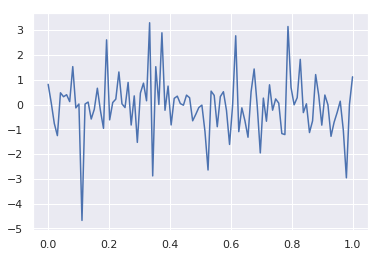

In [28]:
plt.plot(X,  y)
plt.show()

In [ ]:
def n_splits(list_, n):
    increments = len(list_) // n
    return [list_[:] ]

In [47]:
increments = len(y) // 10

In [48]:
increments

10

In [49]:
y

[0.8137481252832421,
 0.06683023520047036,
 -0.767676195861641,
 -1.2552284392504807,
 0.47313242405113387,
 0.31395647031285373,
 0.39485020400092613,
 0.11715252603419414,
 1.5290410282224007,
 -0.1365919417159571,
 0.020252186364922726,
 -4.67606159788875,
 0.01999668305876736,
 0.09843183329415088,
 -0.5858193789726373,
 -0.19444707690338886,
 0.6571409606282008,
 -0.24607894643006234,
 -0.9614107857688979,
 2.608524929509345,
 -0.6191123629922544,
 0.08031354447049946,
 0.21694925908778157,
 1.3131851123198628,
 0.02796168922588345,
 -0.12367891662931649,
 0.8895731197810703,
 -0.8272350368347194,
 0.34807902832097615,
 -1.5278349924340713,
 0.46181930260051685,
 0.8612527039148637,
 0.15062198933452248,
 3.2988785258849456,
 -2.8805867518697466,
 1.526457062109913,
 0.001693400571150521,
 2.8935931972552673,
 -0.232467841193527,
 0.7435348680869014,
 -0.8241438182104402,
 0.2475495692935471,
 0.3374628485346474,
 0.036215026109719765,
 -0.027256613523902413,
 0.3787579105276307,


In [50]:
next_ = 0
for i in range(len(y) // 2):
    print(y[next_:next_ + increments])
    next_ = i + increments
    print('\n\n\n')

[0.8137481252832421, 0.06683023520047036, -0.767676195861641, -1.2552284392504807, 0.47313242405113387, 0.31395647031285373, 0.39485020400092613, 0.11715252603419414, 1.5290410282224007, -0.1365919417159571]




[0.020252186364922726, -4.67606159788875, 0.01999668305876736, 0.09843183329415088, -0.5858193789726373, -0.19444707690338886, 0.6571409606282008, -0.24607894643006234, -0.9614107857688979, 2.608524929509345]




[-4.67606159788875, 0.01999668305876736, 0.09843183329415088, -0.5858193789726373, -0.19444707690338886, 0.6571409606282008, -0.24607894643006234, -0.9614107857688979, 2.608524929509345, -0.6191123629922544]




[0.01999668305876736, 0.09843183329415088, -0.5858193789726373, -0.19444707690338886, 0.6571409606282008, -0.24607894643006234, -0.9614107857688979, 2.608524929509345, -0.6191123629922544, 0.08031354447049946]




[0.09843183329415088, -0.5858193789726373, -0.19444707690338886, 0.6571409606282008, -0.24607894643006234, -0.9614107857688979, 2.608524929509345, -0

In [29]:
y

[0.8137481252832421,
 0.06683023520047036,
 -0.767676195861641,
 -1.2552284392504807,
 0.47313242405113387,
 0.31395647031285373,
 0.39485020400092613,
 0.11715252603419414,
 1.5290410282224007,
 -0.1365919417159571,
 0.020252186364922726,
 -4.67606159788875,
 0.01999668305876736,
 0.09843183329415088,
 -0.5858193789726373,
 -0.19444707690338886,
 0.6571409606282008,
 -0.24607894643006234,
 -0.9614107857688979,
 2.608524929509345,
 -0.6191123629922544,
 0.08031354447049946,
 0.21694925908778157,
 1.3131851123198628,
 0.02796168922588345,
 -0.12367891662931649,
 0.8895731197810703,
 -0.8272350368347194,
 0.34807902832097615,
 -1.5278349924340713,
 0.46181930260051685,
 0.8612527039148637,
 0.15062198933452248,
 3.2988785258849456,
 -2.8805867518697466,
 1.526457062109913,
 0.001693400571150521,
 2.8935931972552673,
 -0.232467841193527,
 0.7435348680869014,
 -0.8241438182104402,
 0.2475495692935471,
 0.3374628485346474,
 0.036215026109719765,
 -0.027256613523902413,
 0.3787579105276307,
